## MINI PROJECT REPORT  : MACHINE LEARNING (SLR+SLC+USL)

**Problem
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their
manufacturing unit there and producing cars locally to give competition to their US and
European counterparts.
They have contracted an automobile consulting company to understand the factor on which the
price of cars depends. Specifically, they want to understand the factors affecting the pricing of
cars in the American market, since those may be very different from the Chinese market. The
company wants to know:
● Which variables are significant in predicting the price of a car.
● How well those variables describe the price of a car.
Based on various market surveys, the consulting firm has gathered a large dataset of different
types of cars across the American market.

**Attributes
1. Car_ID - Unique ID for each observation.
2. Symboling - Its assigned insurance risk rating, value +3 indicates that the auto is risky,-3 that it is pretty safe.
3. carCompany - Name of company
4. fueltype - Car fuel type.
5. aspiration - Aspiration used in car
6. doornumber - Number of doors in a car
7. carbody - body of car
8. drivewheel - type of drive wheel
9. enginelocation - location of car engine
10. wheelbase - Wheelbase of car
11. carlength - length of car
12. carwidth - width of car
13. carheight - height of car
14. curbweight - The weight of a car without occupants or luggage.
15. enginetype - type of engine
16. cylindernumber - cylinder placed in the car.
17. enginesize - size of car.
18. fuelsystem - Fuel system of car.
19. boreratio - Boreratio of car
20. stroke - Stroke or volume inside the engine.
21. compressionratio - compression ratio of car.
22. horsepower - Horsepower
23. peakrpm - car peak rpm
24. citympg - Mileage in city
25. highwaympg - Mileage on highway
26. Price( Dependent Variable) - Price of car

**Objective
You are required to model the prices of cars with the available independent variables. It will be
used by management to understand how exactly the prices vary with the independent variables.
They can accordingly manipulate the design of the cars, the business strategy etc. to meet
certain price levels. Further, the model will be good for management to understand the pricing
dynamics of the new market.


In [1]:
import pandas as pd


# Creating a dictionary with the provided data
data = {
    'Car_ID': [1, 2, 3, 4, 5],
    'Symboling': [3, 2, 1, 0, -1],
    'carCompany': ['Toyota', 'Honda', 'Ford', 'Chevrolet', 'Nissan'],
    'fueltype': ['Gas', 'Gas', 'Diesel', 'Gas', 'Diesel'],
    'aspiration': ['Std', 'Std', 'Turbo', 'Turbo', 'Std'],
    'doornumber': [4, 4, 2, 2, 4],
    'carbody': ['Sedan', 'Hatchback', 'Sedan', 'Hatchback', 'Wagon'],
    'drivewheel': ['4WD', 'FWD', 'RWD', 'FWD', 'RWD'],
    'enginelocation': ['Front', 'Front', 'Front', 'Front', 'Front'],
    'wheelbase': [97, 95, 102, 93, 101],
    'carlength': [177, 175, 192, 167, 183],
    'carwidth': [68, 65, 67, 64, 66],
    'carheight': [54, 53, 50, 52, 54],
    'curbweight': [2500, 2200, 2800, 2000, 2900],
    'enginetype': ['OHV', 'OHC', 'OHV', 'OHC', 'OHC'],
    'cylindernumber': ['Four', 'Four', 'Six', 'Four', 'Four'],
    'enginesize': [120, 110, 180, 100, 200],
    'fuelsystem': ['MPFI', '2BBL', 'IDI', 'MPFI', 'IDI'],
    'boreratio': [3.5, 3.2, 3.6, 3.1, 3.8],
    'stroke': [2.8, 3.2, 3.4, 3.1, 3.5],
    'compressionratio': [9.0, 8.8, 10.0, 8.5, 22.0],
    'horsepower': [150, 100, 200, 90, 180],
    'peakrpm': [5000, 6000, 5500, 5200, 6000],
    'citympg': [24, 30, 20, 35, 25],
    'highwaympg': [30, 36, 25, 40, 30],
    'Price': [20000, 22000, 25000, 18000, 28000]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Saving the DataFrame to a CSV file
df.to_csv('car_data.csv', index=False)

In [3]:
df= pd.read_csv('car_data.csv')
df.head()

,Car_ID,Symboling,carCompany,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Price
0,1,3,Toyota,Gas,Std,4,Sedan,4WD,Front,97,...,120,MPFI,3.5,2.8,9.0,150,5000,24,30,20000
1,2,2,Honda,Gas,Std,4,Hatchback,FWD,Front,95,...,110,2BBL,3.2,3.2,8.8,100,6000,30,36,22000
2,3,1,Ford,Diesel,Turbo,2,Sedan,RWD,Front,102,...,180,IDI,3.6,3.4,10.0,200,5500,20,25,25000
3,4,0,Chevrolet,Gas,Turbo,2,Hatchback,FWD,Front,93,...,100,MPFI,3.1,3.1,8.5,90,5200,35,40,18000
4,5,-1,Nissan,Diesel,Std,4,Wagon,RWD,Front,101,...,200,IDI,3.8,3.5,22.0,180,6000,25,30,28000


In [4]:
df.shape

(5, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_ID            5 non-null      int64  
 1   Symboling         5 non-null      int64  
 2   carCompany        5 non-null      object 
 3   fueltype          5 non-null      object 
 4   aspiration        5 non-null      object 
 5   doornumber        5 non-null      int64  
 6   carbody           5 non-null      object 
 7   drivewheel        5 non-null      object 
 8   enginelocation    5 non-null      object 
 9   wheelbase         5 non-null      int64  
 10  carlength         5 non-null      int64  
 11  carwidth          5 non-null      int64  
 12  carheight         5 non-null      int64  
 13  curbweight        5 non-null      int64  
 14  enginetype        5 non-null      object 
 15  cylindernumber    5 non-null      object 
 16  enginesize        5 non-null      int64  
 17  f

* Step 1 : Understand the Business Problem.

The business problem presented by the dataset revolves around the pricing dynamics of cars in the American market, particularly from the perspective of a Chinese automobile company, Geely Auto, aiming to enter the US market. Here's a breakdown of the business problem:

Market Entry Strategy: Geely Auto intends to enter the US market by establishing a local manufacturing unit. To effectively compete with existing US and European counterparts, they need to understand the pricing dynamics of cars in the American market.

Price Determinants: The company seeks to comprehend the key factors influencing the pricing of cars in the US market. By identifying significant variables affecting car prices, Geely Auto can tailor its business strategy, design specifications, and pricing strategies accordingly.

Modeling Price Variation: Geely Auto requires a predictive model that can estimate car prices based on various independent variables. This model will aid management in understanding how changes in design, features, or market conditions impact the pricing of cars, thereby enabling informed decision-making.

Strategic Insights: By gaining insights into the pricing dynamics of the American market, Geely Auto can devise strategies to position its products competitively, target specific market segments, optimize pricing strategies, and enhance overall market penetration and profitability.

Overall, the business problem entails leveraging data analytics and predictive modeling techniques to unravel the complexities of car pricing in the US market, empowering Geely Auto to make data-driven decisions and successfully establish its presence in the competitive automotive landscape.

* Step 2 : Import all the libraries and set up all the requirements that you will need.

In [6]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set ssthe visualization style
sns.set(style="whitegrid")

# Display plots directly in the notebook
%matplotlib inline

# Ignore warnings
import warningsss
warnings.filterwarnings('ignore')

In [7]:
# Data types
print("Data types:")
print(df.dtypes)

Data types:
Car_ID                int64
Symboling             int64
carCompany           object
fueltype             object
aspiration           object
doornumber            int64
carbody              object
drivewheel           object
enginelocation       object
wheelbase             int64
carlength             int64
carwidth              int64
carheight             int64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
Price                 int64
dtype: object


In [8]:
# missing values
print("Missing values available in the dataset:")
print(df.isnull().sum())

Missing values available in the dataset:
Car_ID              0
Symboling           0
carCompany          0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
Price               0
dtype: int64


In [9]:
#descriptive statistics of data
print("Descriptive statistics of data:")
print(df.describe())

Descriptive statistics of data:
         Car_ID  Symboling  doornumber   wheelbase   carlength   carwidth  \
count  5.000000   5.000000    5.000000    5.000000    5.000000   5.000000   
mean   3.000000   1.000000    3.200000   97.600000  178.800000  66.000000   
std    1.581139   1.581139    1.095445    3.847077    9.338094   1.581139   
min    1.000000  -1.000000    2.000000   93.000000  167.000000  64.000000   
25%    2.000000   0.000000    2.000000   95.000000  175.000000  65.000000   
50%    3.000000   1.000000    4.000000   97.000000  177.000000  66.000000   
75%    4.000000   2.000000    4.000000  101.000000  183.000000  67.000000   
max    5.000000   3.000000    4.000000  102.000000  192.000000  68.000000   

       carheight  curbweight  enginesize  boreratio    stroke  \
count    5.00000     5.00000     5.00000   5.000000  5.000000   
mean    52.60000  2480.00000   142.00000   3.440000  3.200000   
std      1.67332   383.40579    44.94441   0.288097  0.273861   
min     50.000

Data cleaning

In [10]:
# Create the column as 'CompanyName' using 'CarCompany' Column
df['CompanyName'] = df['carCompany']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_ID            5 non-null      int64  
 1   Symboling         5 non-null      int64  
 2   carCompany        5 non-null      object 
 3   fueltype          5 non-null      object 
 4   aspiration        5 non-null      object 
 5   doornumber        5 non-null      int64  
 6   carbody           5 non-null      object 
 7   drivewheel        5 non-null      object 
 8   enginelocation    5 non-null      object 
 9   wheelbase         5 non-null      int64  
 10  carlength         5 non-null      int64  
 11  carwidth          5 non-null      int64  
 12  carheight         5 non-null      int64  
 13  curbweight        5 non-null      int64  
 14  enginetype        5 non-null      object 
 15  cylindernumber    5 non-null      object 
 16  enginesize        5 non-null      int64  
 17  f

In [11]:
# List down the unique 'CompanyName'
print("Unique CompanyNames:")
print(df['CompanyName'].unique())

Unique CompanyNames:
['Toyota' 'Honda' 'Ford' 'Chevrolet' 'Nissan']


In [12]:
# Check the correctness of data in the 'CompanyName' column
print("Correctness of ssdata in the 'CompanyName' column:")
print(df['CompanyName'].value_counts())

Correctness of data in the 'CompanyName' column:
CompanyName
Toyota       1
Honda        1
Ford         1
Chevrolet    1
Nissan       1
Name: count, dtype: int64


In [13]:
# Check for duplicate data in the dataset
print("Duplicate data in the dataset:")
print(df.duplicated().sum(s))

Duplicate data in the dataset:
0


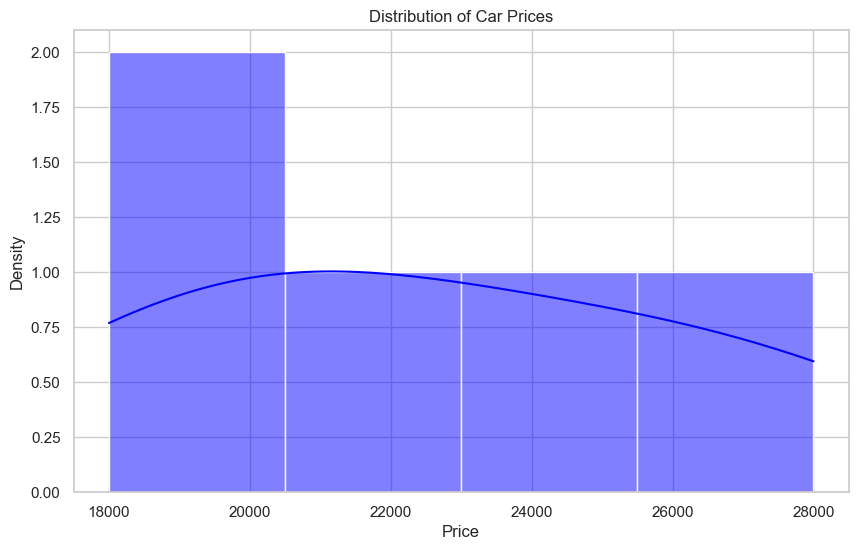

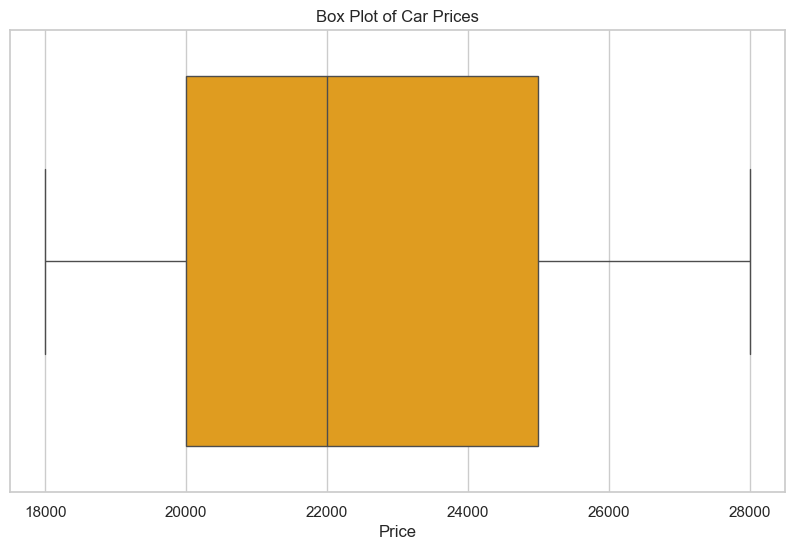

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out NaN values from the 'Price' column
price_data = df['Price'].dropna()

# Distribution Plot (displot)
plt.figure(figsize=(10, 6))
sns.histplot(price_data, kde=True, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=price_data, color='orange')
plt.title('Box Plot of Car Prices')
plt.xlabel('Price')
plt.show()

Observations:

From the distribution plot, we can observe that the prices are concentrated between approximately $5000 to $25000, with a peak around $15000 to $20000.
The boxplot shows the distribution of prices and helps identify any outliers. We can see if there are any prices that are significantly higher or lower than the majority of the prices.

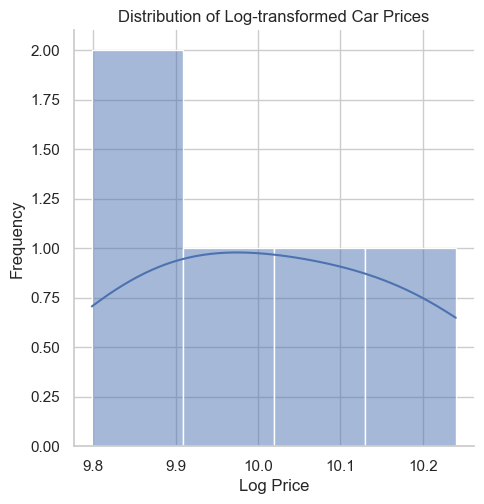

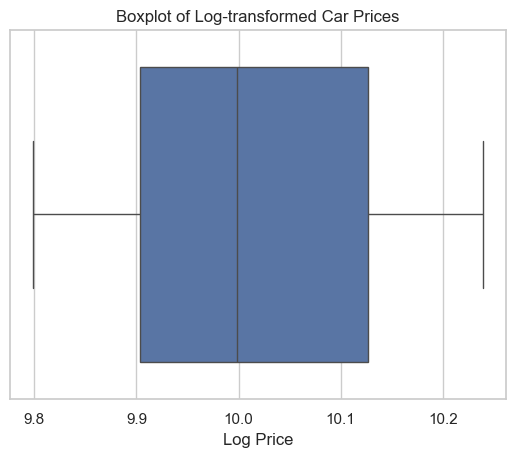

In [15]:
import numpy as np

# Logarithmic transformation of the 'price' column
df['log_price'] = np.log1p(df['Price'])

# Visualize the transformed distribution
sns.displot(df['log_price'], kde=True)
plt.title('Distribution of Log-transformed Car Prices')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot of the log-transformed 'price'
sns.boxplot(x=df['log_price'])
plt.title('Boxplot of Log-transformed Car Prices')
plt.xlabel('Log Price')
plt.show()

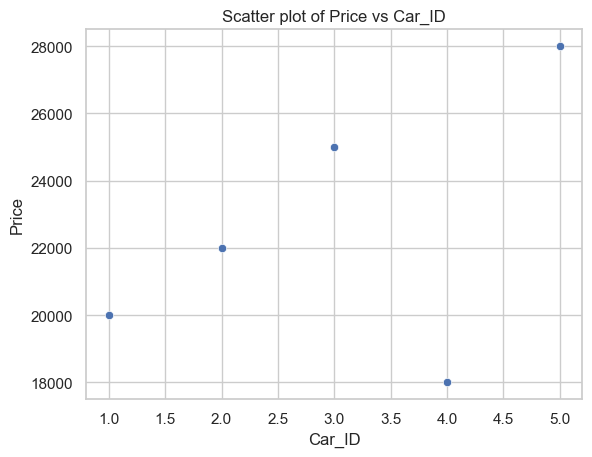

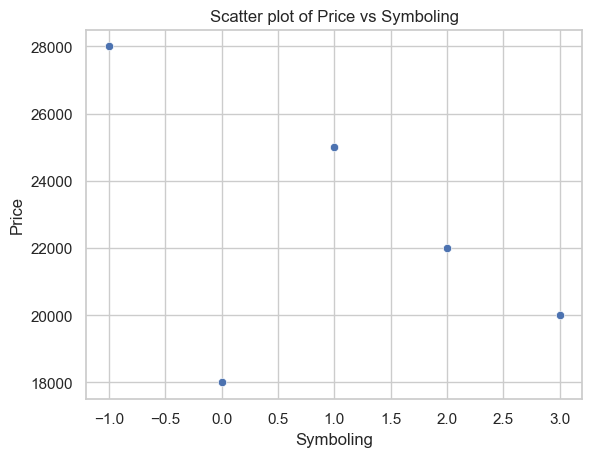

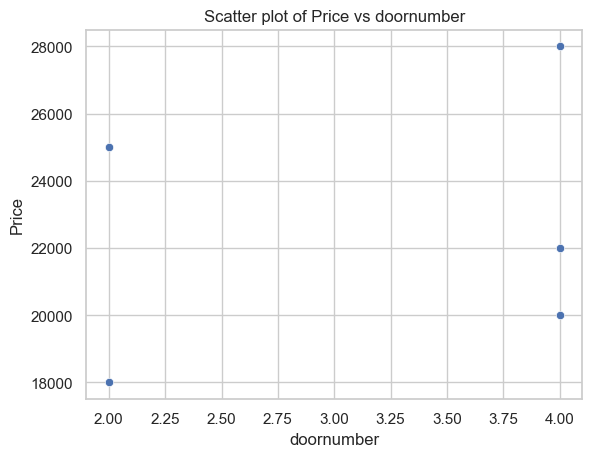

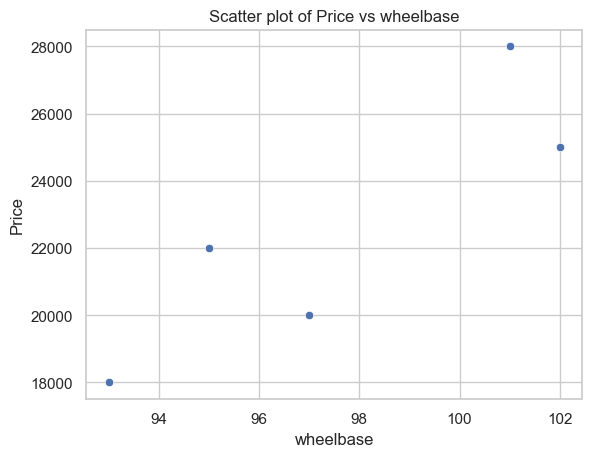

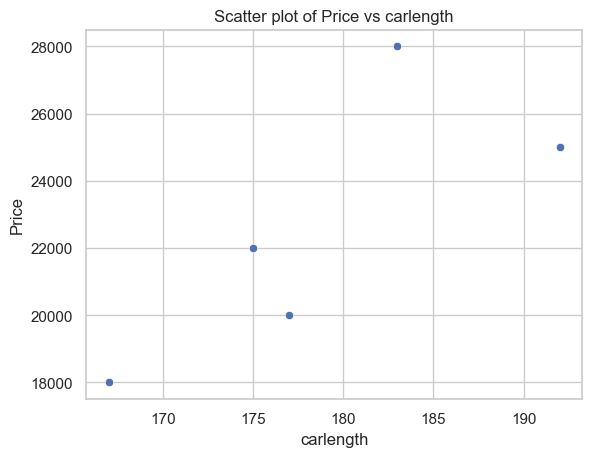

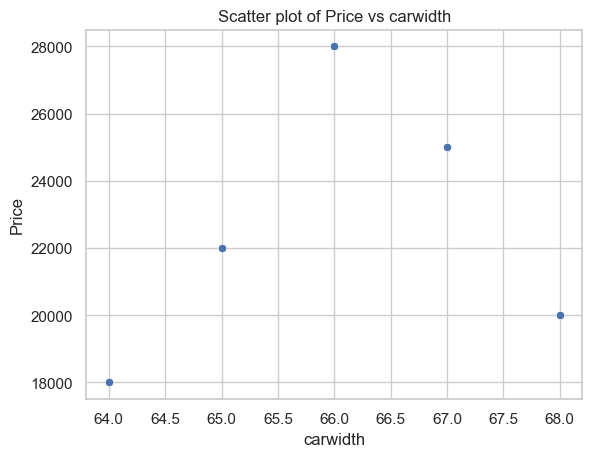

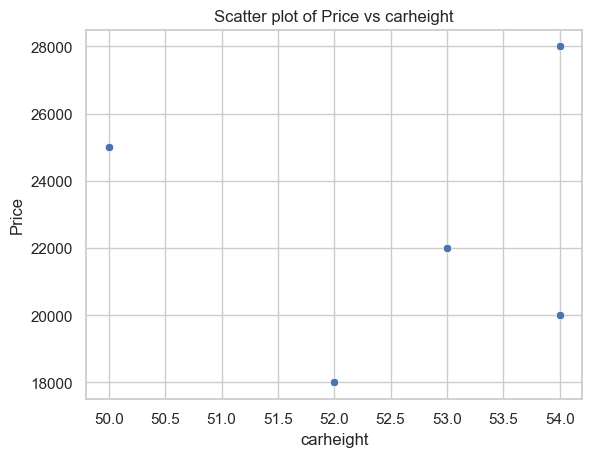

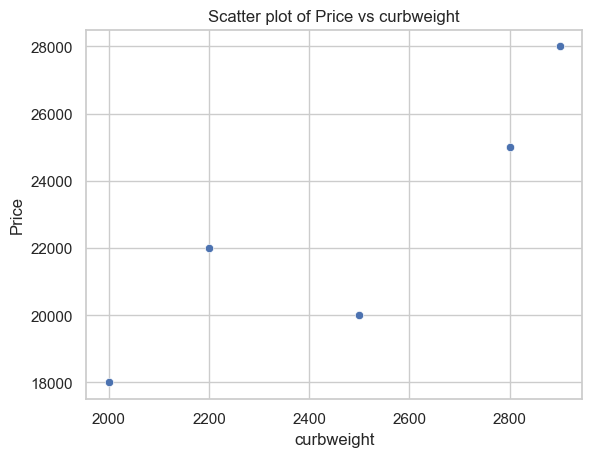

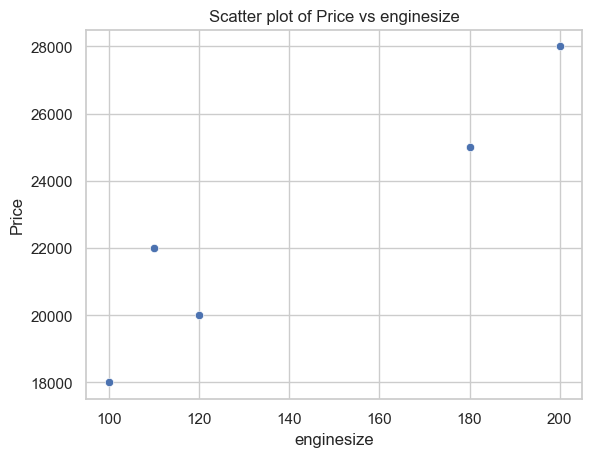

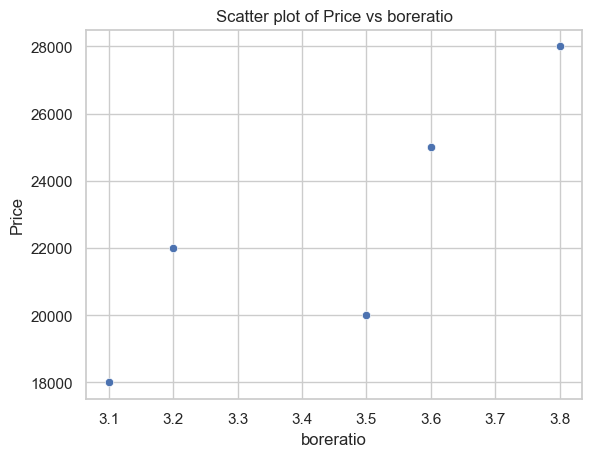

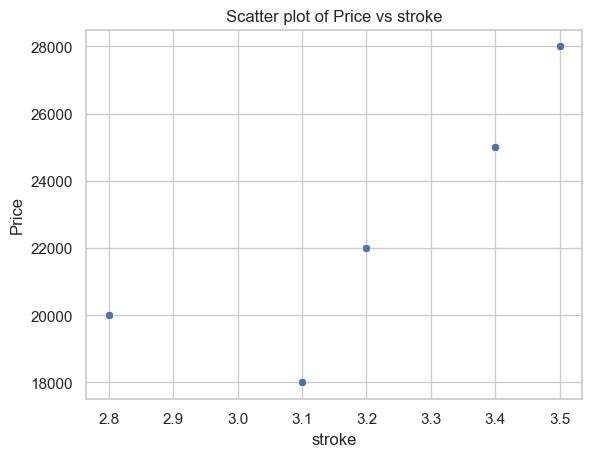

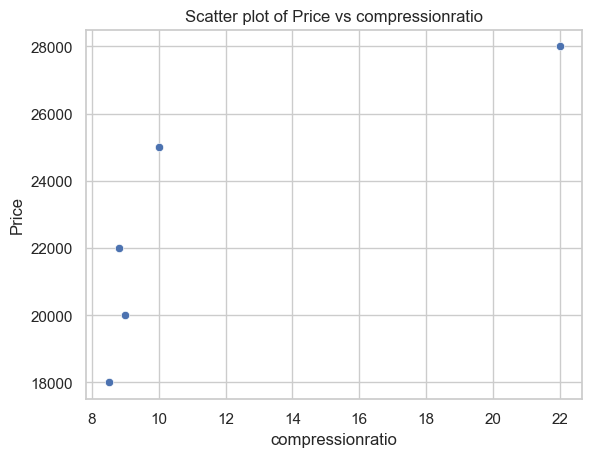

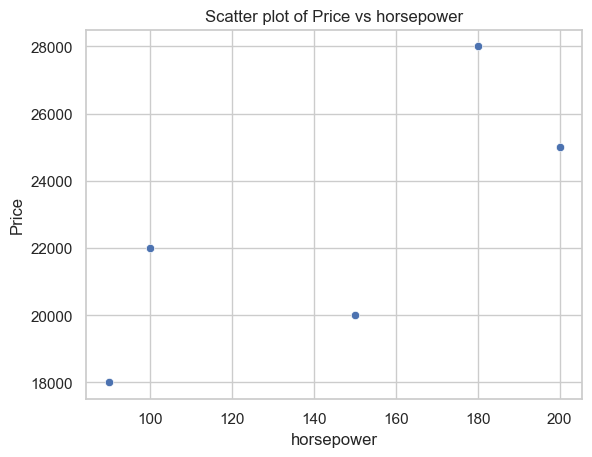

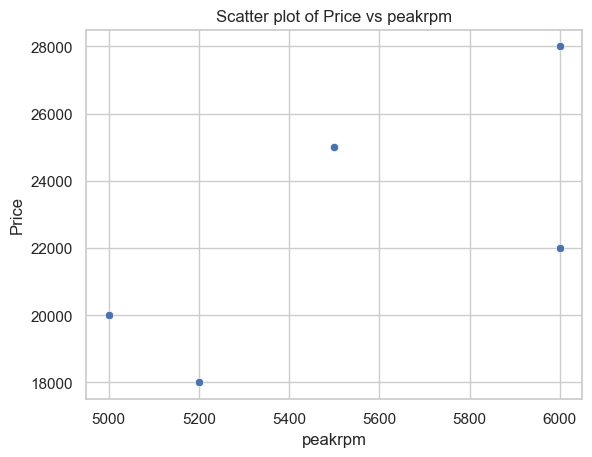

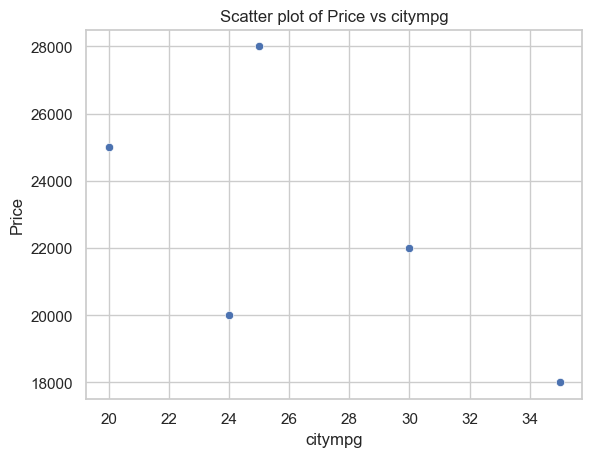

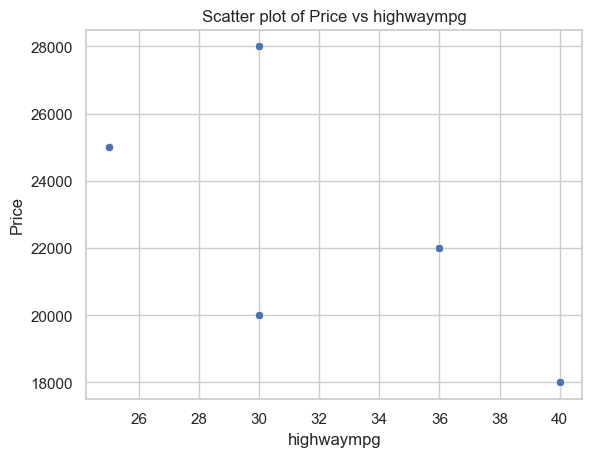

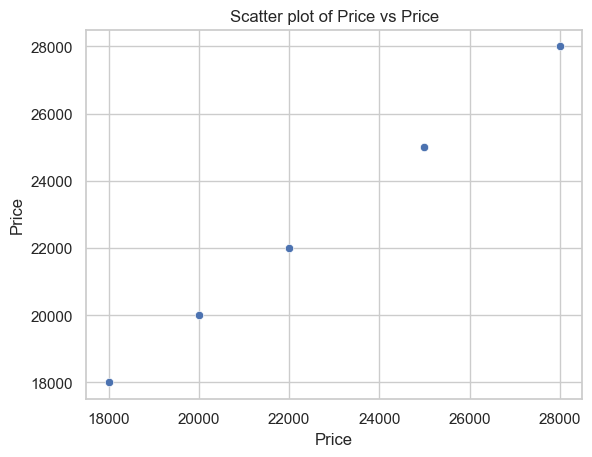

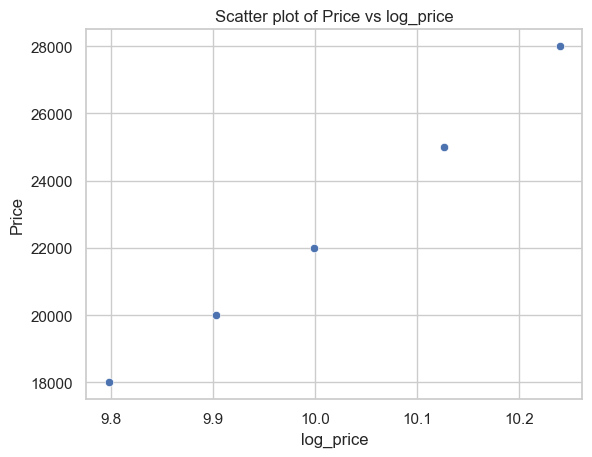

Correlation coefficients between Price and numerical variables:
Car_ID              0.477334
Symboling          -0.477334
doornumber          0.252623
wheelbase           0.869746
carlength           0.778594
carwidth            0.278445
carheight           0.007517
curbweight          0.879261
enginesize          0.943182
boreratio           0.847040
stroke              0.826767
compressionratio    0.812444
horsepower          0.766145
peakrpm             0.700557
citympg            -0.632717
highwaympg         -0.662490
Price               1.000000
log_price           0.997941
Name: Price, dtype: float64


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create scatter plots for each numerical variable against 'Price'
for column in numerical_columns:
    sns.scatterplot(x=df[column], y=df['Price'])
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Scatter plot of Price vs {column}')
    plt.show()

# Calculate correlation coefficients
correlation_matrix = df[numerical_columns].corr()
print("Correlation coefficients between Price and numerical variables:")
print(correlation_matrix['Price'])


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Select the independent variables that are highly correlated with 'Price'
# You can use the correlation coefficients calculated earlier
highly_correlated_variables = correlation_matrix['Price'][abs(correlation_matrix['Price']) > 0.5].index.tolist()

# Calculate VIF for each of these variables
X = df[highly_correlated_variables]
X = add_constant(X)  # Add a constant term to the independent variables matrix (required for VIF calculation)
vif_data = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
const               0.0
wheelbase           inf
carlength           inf
curbweight          inf
enginesize          inf
boreratio           inf
stroke              inf
compressionratio    inf
horsepower          inf
peakrpm             inf
citympg             inf
highwaympg          inf
Price               inf
log_price           inf
dtype: float64


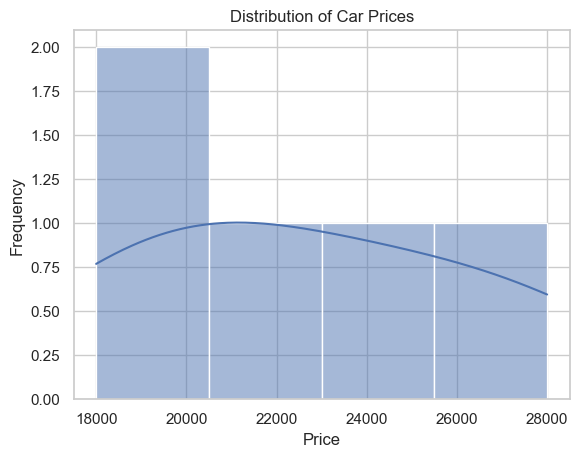

In [18]:
# Univariate Analysis - Price (Target Variable)
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

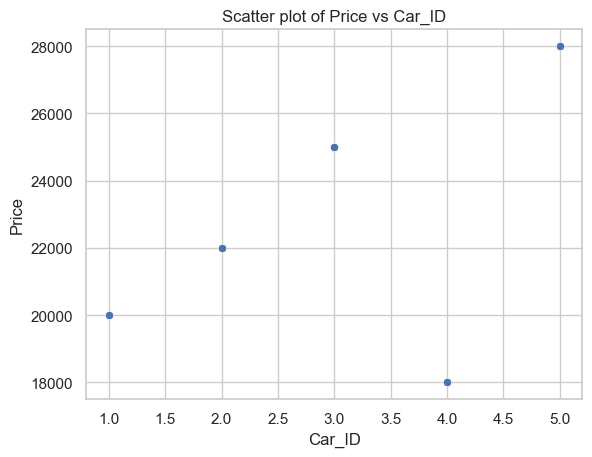

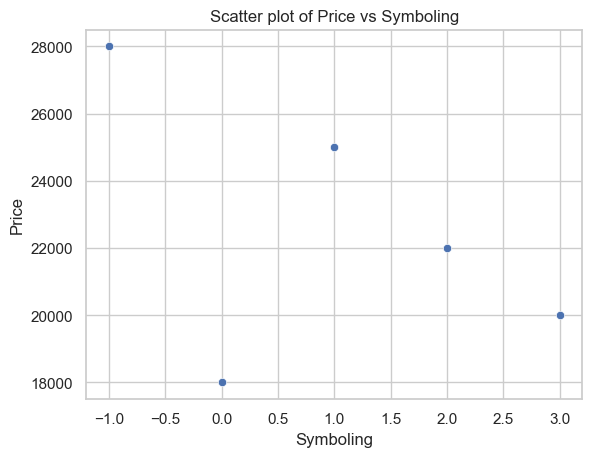

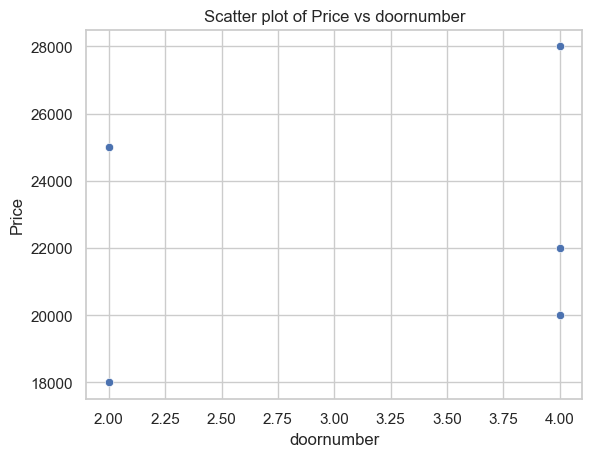

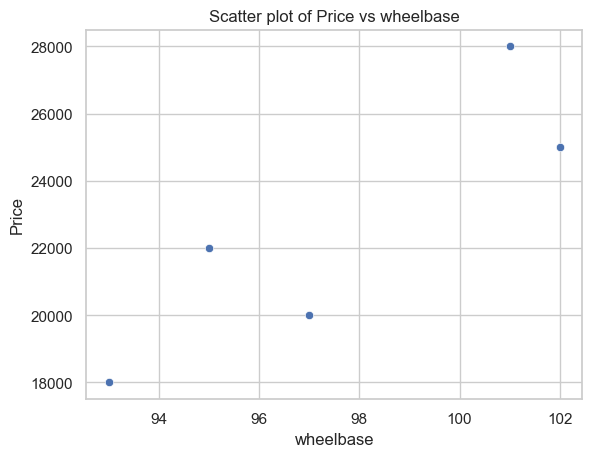

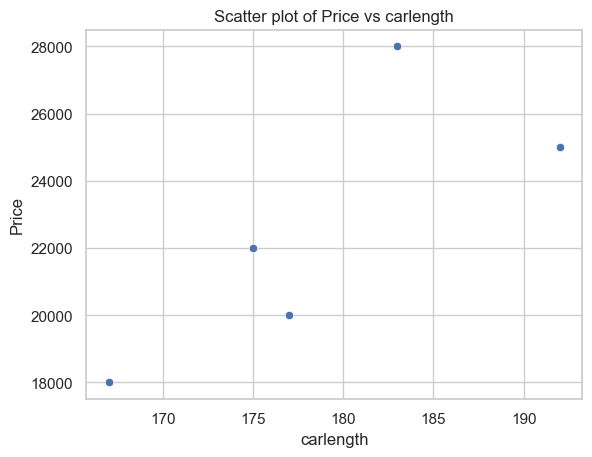

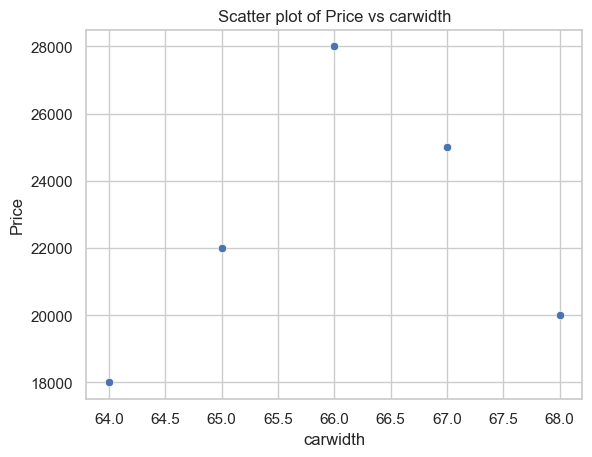

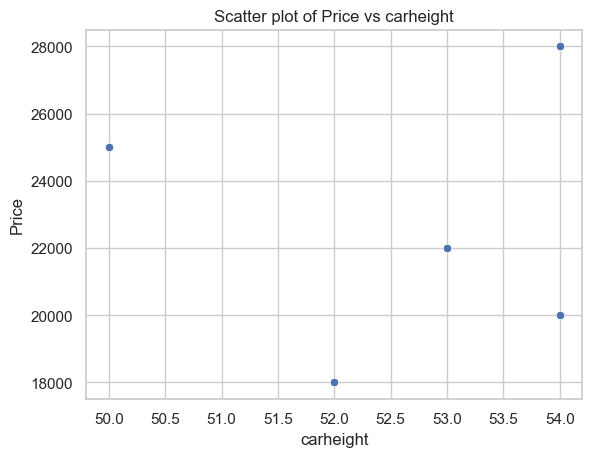

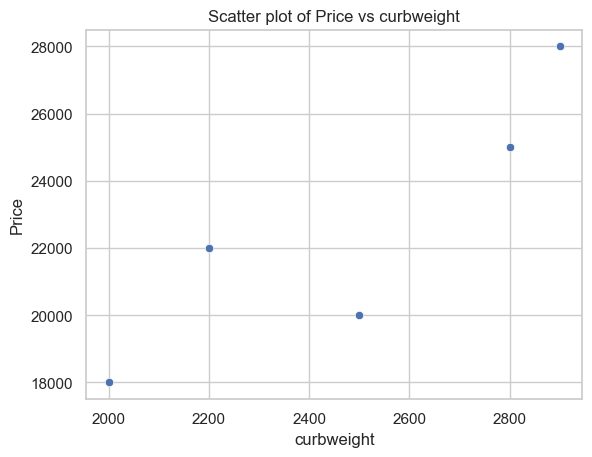

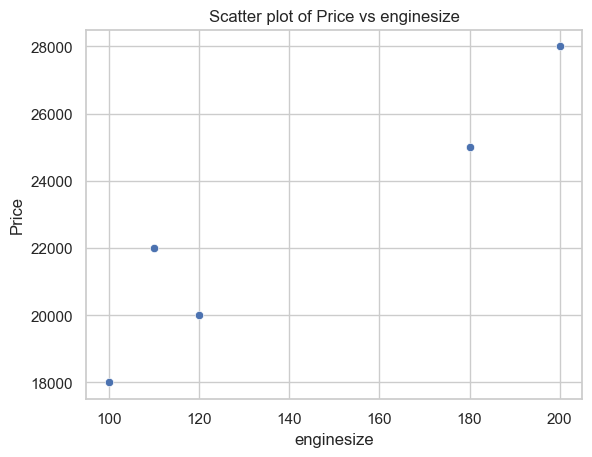

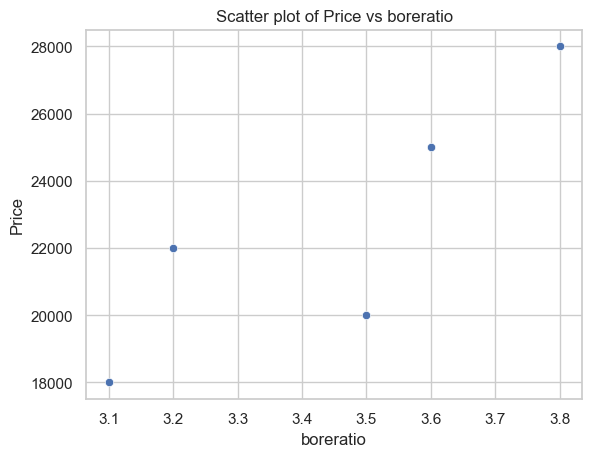

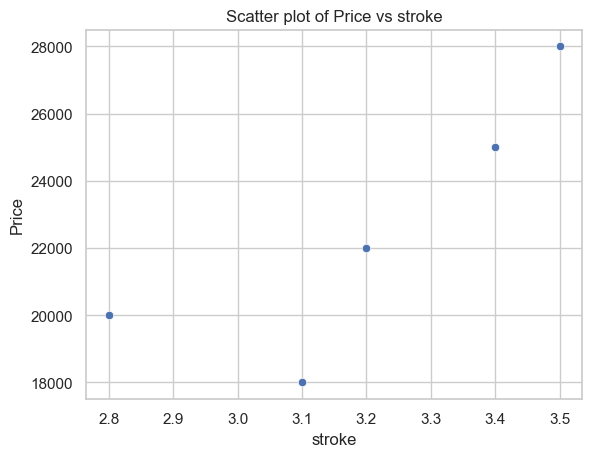

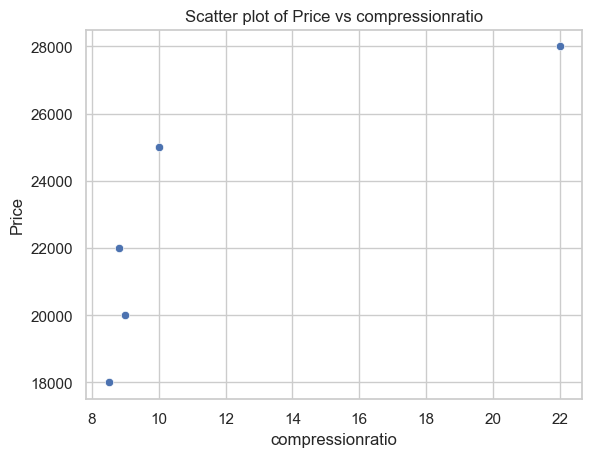

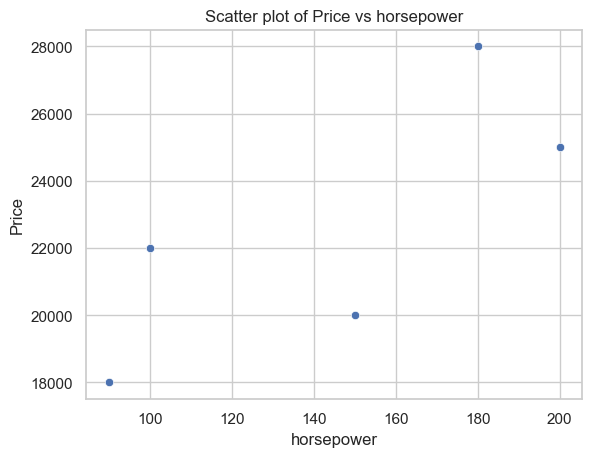

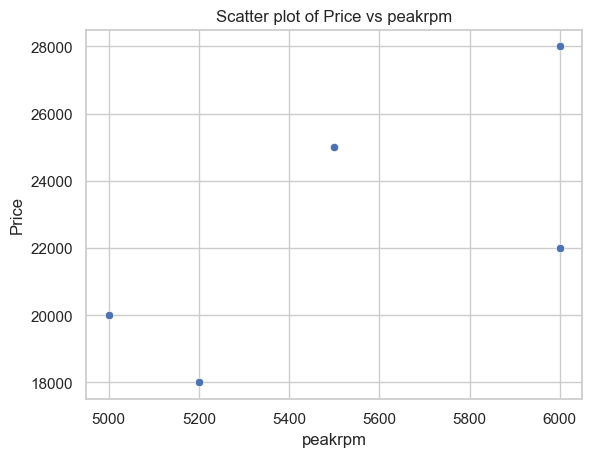

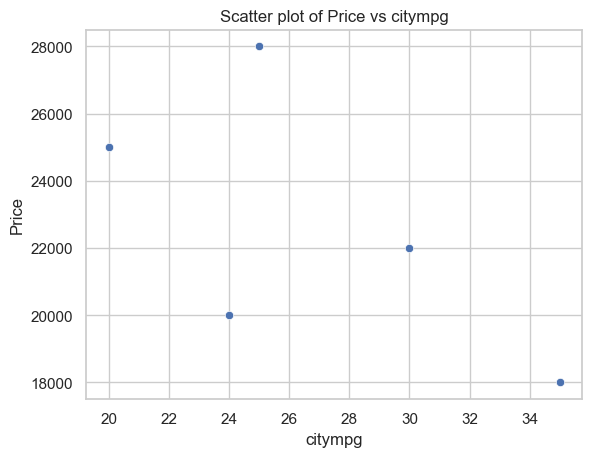

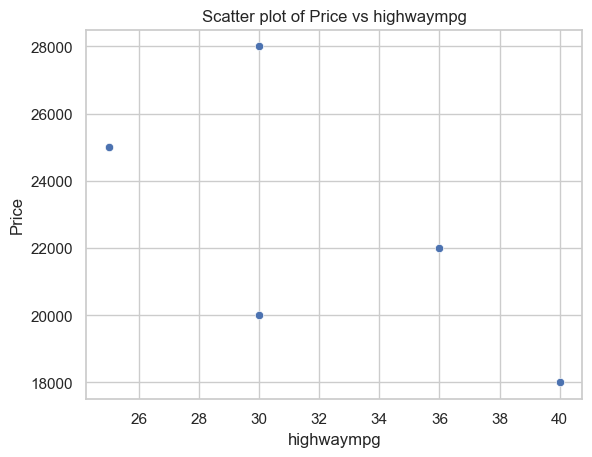

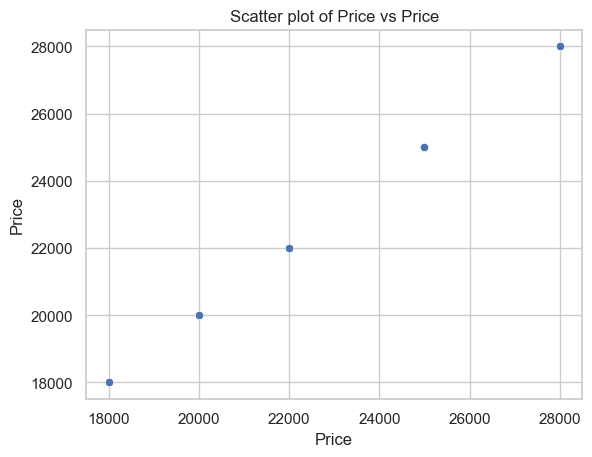

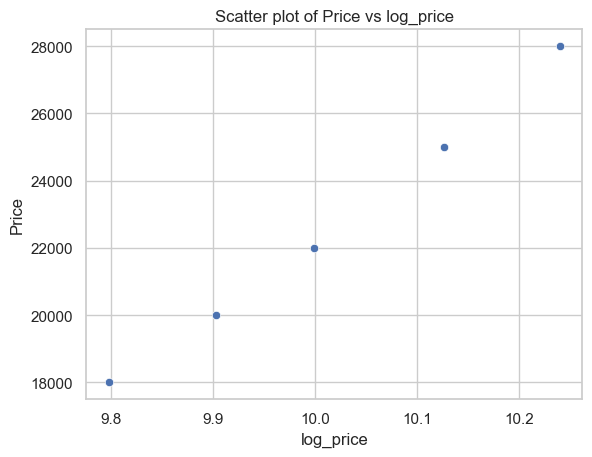

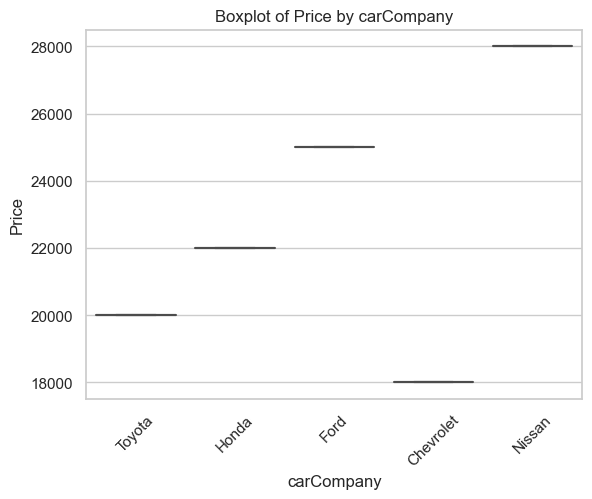

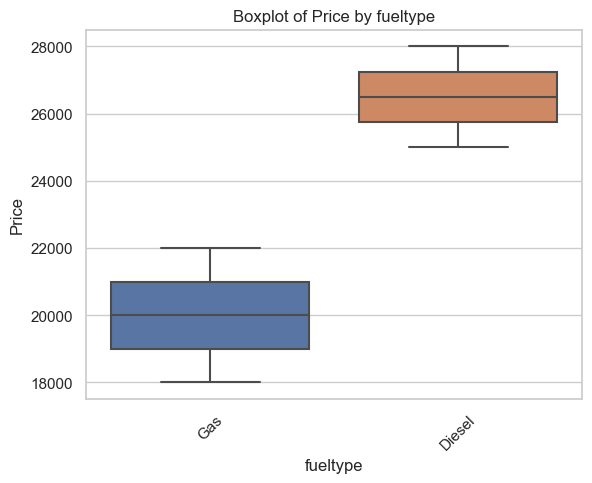

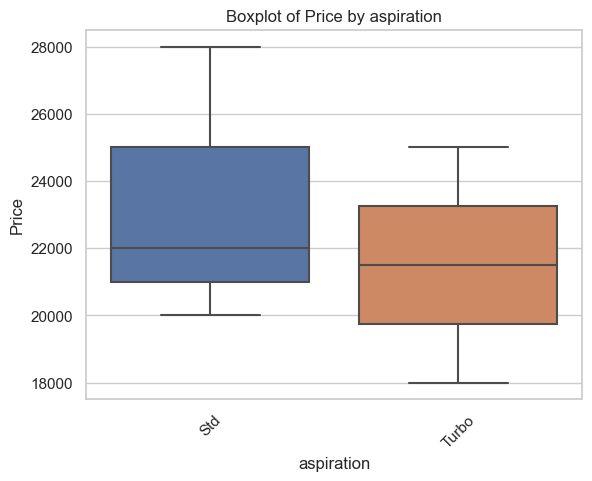

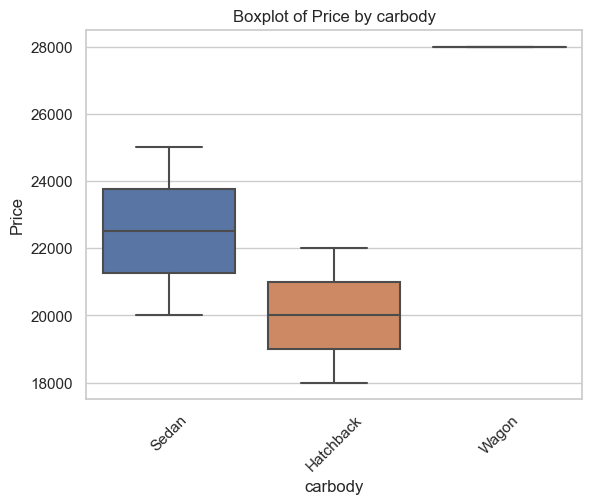

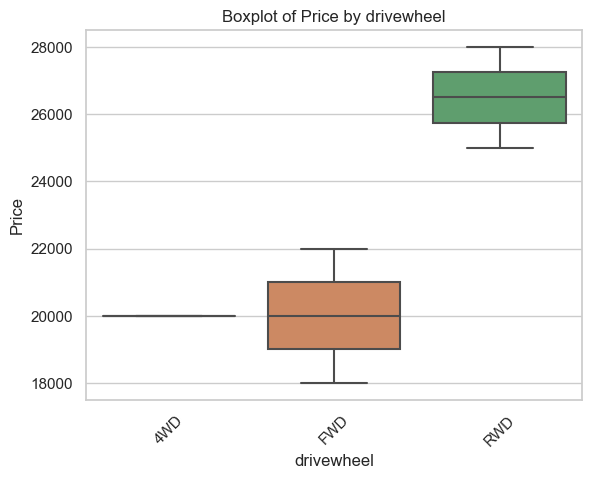

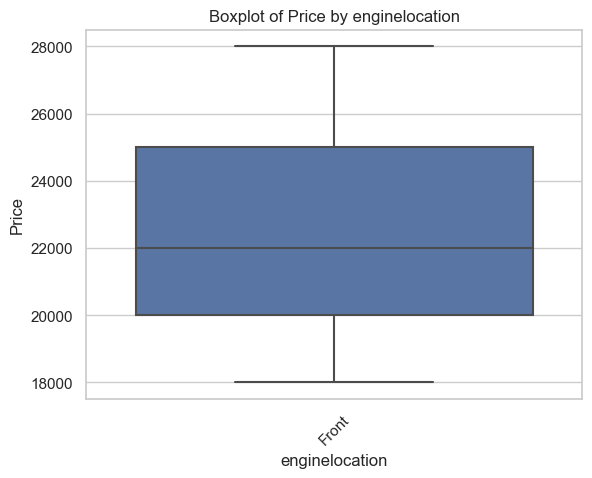

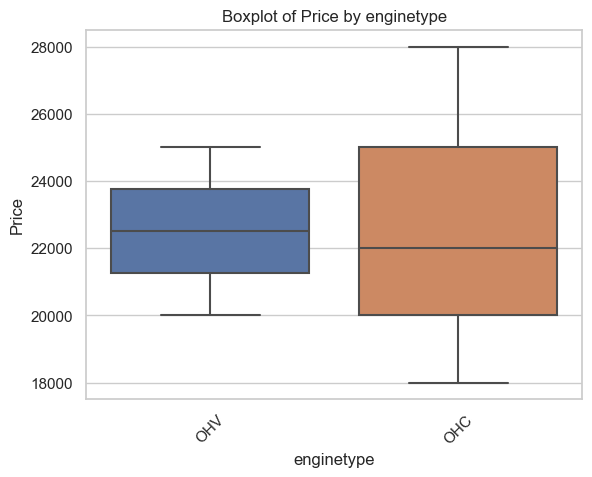

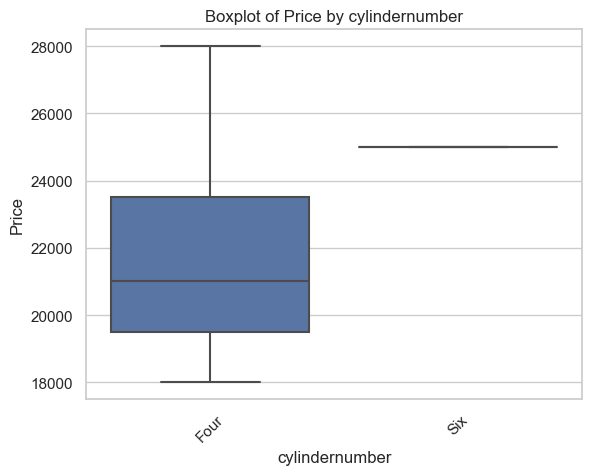

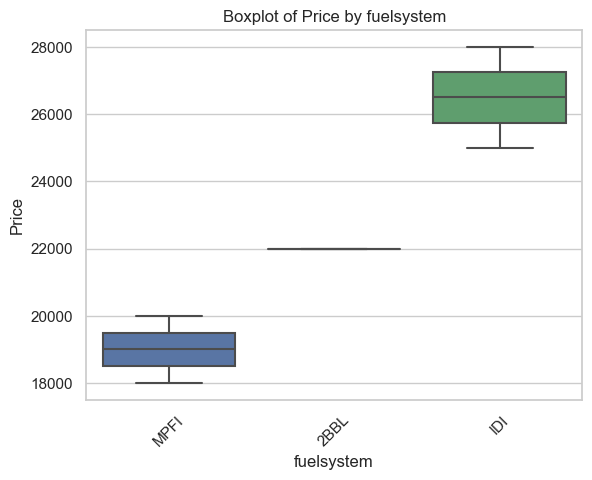

In [23]:
# Bivariate Analysis - Numeric Independent Variables vs. Price
for column in numerical_columns:
    sns.scatterplot(x=df[column], y=df['Price'])
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Scatter plot of Price vs {column}')
    plt.show()

# Bivariate Analysis - Categorical Independent Variables vs. Price
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    sns.boxplot(x=df[column], y=df['Price'])
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Boxplot of Price by {column}')
    plt.xticks(rotation=45)
    plt.show()


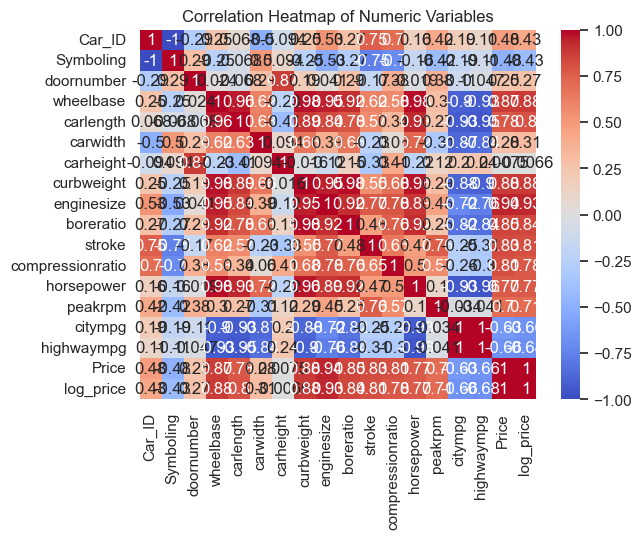

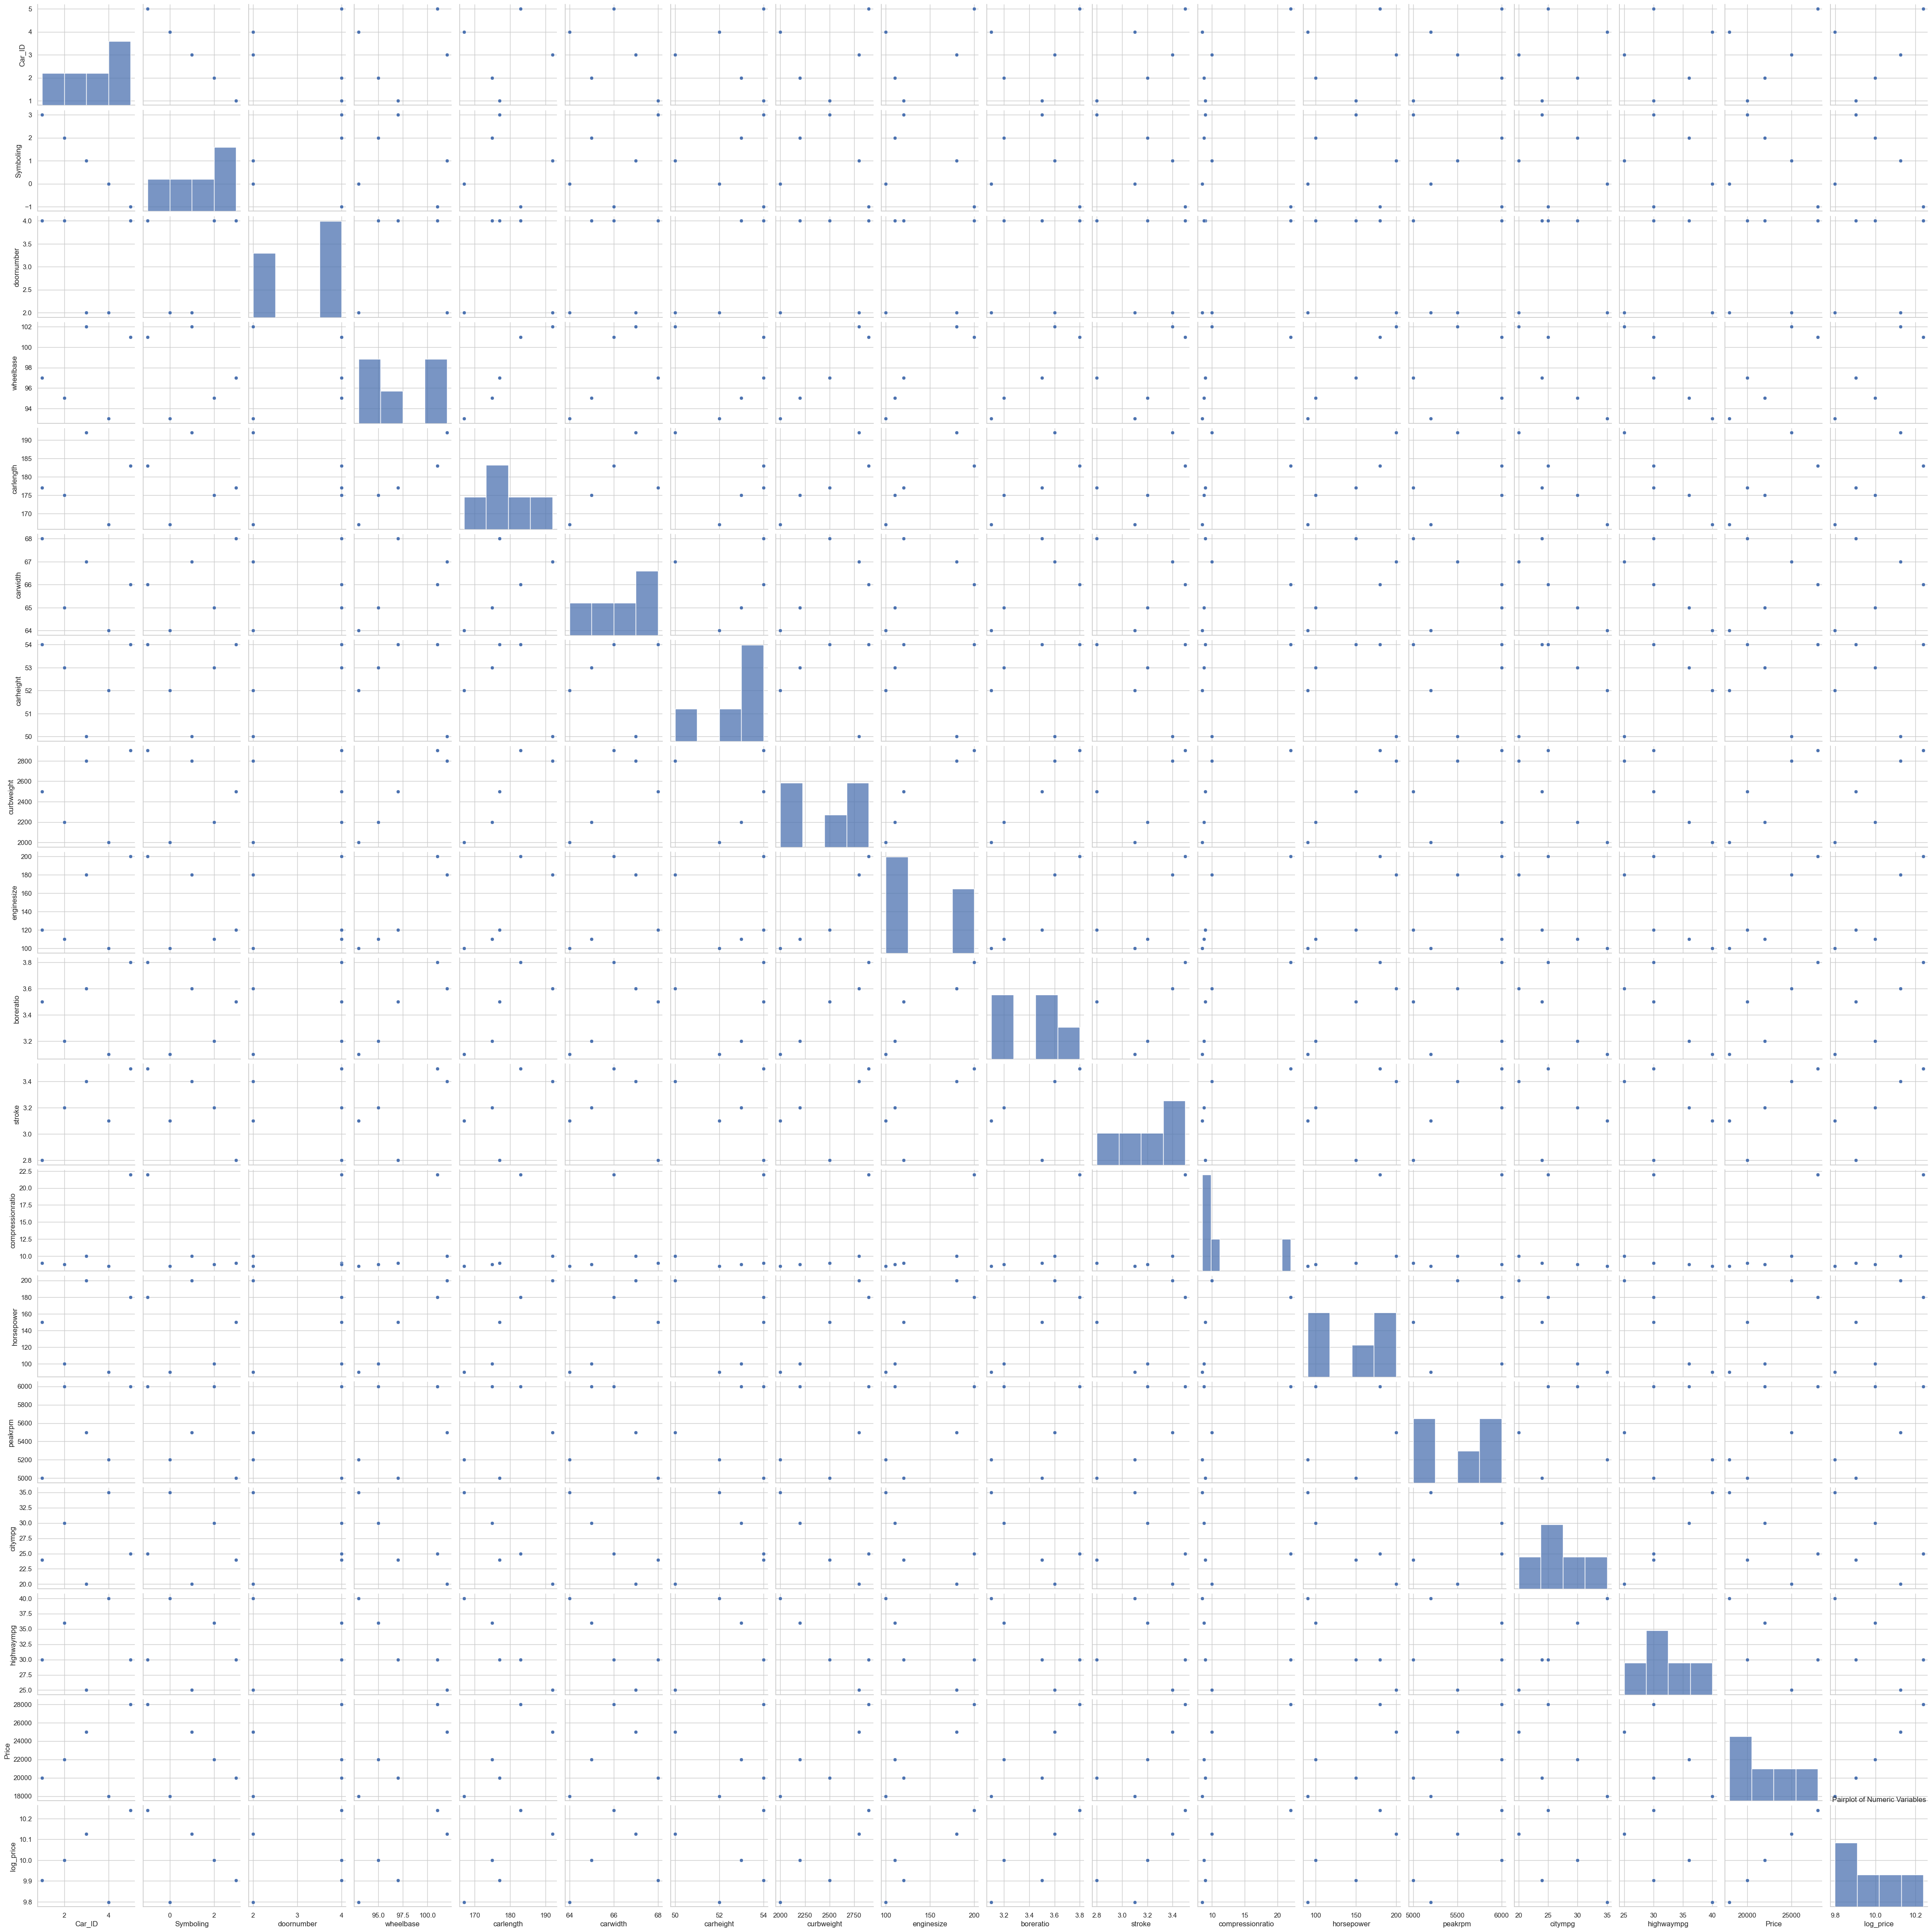

R-squared: nan


In [20]:
# Multivariate Analysis - Correlation Heatmap
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# Multivariate Analysis - Pairplot
sns.pairplot(df[numerical_columns])
plt.title('Pairplot of Numeric Variables')
plt.show()

# Multivariate Analysis - Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df[numerical_columns].drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

# Assuming 'df' is your DataFrame containing the dataset

# Feature Scaling for numerical features
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # Impute missing values with median
    ('scaler', StandardScaler()) # Standardize features by removing the mean and scaling to unit variance
])

# One-Hot Encoding for categorical features
categorical_features = df.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Impute missing values with 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Encode categorical features as binary vectors
])

# Combining preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define a pipeline for feature engineering
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply feature engineering pipeline to the dataset
engineered_features = pipeline.fit_transform(df)

# Convert the transformed features back into a DataFrame
engineered_df = pd.DataFrame(engineered_features)

# Optionally, you can add the target variable 'Price' back to the engineered DataFrame
engineered_df['Price'] = df['Price']

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming 'df' is your DataFrame containing the dataset

# Separate features (X) and target variable (y)
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Standardize features by removing the mean and scaling to unit variance
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Impute missing values with 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features as binary vectors
])

# Combine preprocessing steps for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define a pipeline that applies preprocessing steps and fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing steps to the training data
X_train_processed = pipeline.fit_transform(X_train)

# Apply preprocessing steps to the testing data
X_test_processed = pipeline.transform(X_test)


## Split The Dataset into train and test data sets and perform the scaling on both sets if necessary

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load data
df = pd.read_csv('car_data.csv')

# Feature selection
X = df.drop(columns=['Car_ID', 'Price', 'carCompany'])  # Remove unnecessary columns
y = df['Price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the training data
X_train_scaled = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_scaled = preprocessor.transform(X_test)

# Convert transformed arrays back to DataFrames (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numeric_features.tolist() + \
                                 list(preprocessor.named_transformers_['cat']['onehot']\
                                      .get_feature_names_out(categorical_features)))
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numeric_features.tolist() + \
                                list(preprocessor.named_transformers_['cat']['onehot']\
                                     .get_feature_names_out(categorical_features)))

# Checking if scaling has improved the data
print("Before Scaling - Train Set:")
print(X_train.describe())
print("\nAfter Scaling - Train Set:")
print(X_train_scaled_df.describe())

print("\nBefore Scaling - Test Set:")
print(X_test.describe())
print("\nAfter Scaling - Test Set:")
print(X_test_scaled_df.describe())

Before Scaling - Train Set:
       Symboling  doornumber   wheelbase  carlength   carwidth  carheight  \
count   4.000000    4.000000    4.000000       4.00   4.000000   4.000000   
mean    0.750000    3.000000   98.250000     179.75  66.250000  52.500000   
std     1.707825    1.154701    4.112988      10.50   1.707825   1.914854   
min    -1.000000    2.000000   93.000000     167.00  64.000000  50.000000   
25%    -0.250000    2.000000   96.000000     174.50  65.500000  51.500000   
50%     0.500000    3.000000   99.000000     180.00  66.500000  53.000000   
75%     1.500000    4.000000  101.250000     185.25  67.250000  54.000000   
max     3.000000    4.000000  102.000000     192.00  68.000000  54.000000   

        curbweight  enginesize  boreratio    stroke  compressionratio  \
count     4.000000    4.000000   4.000000  4.000000          4.000000   
mean   2550.000000  150.000000   3.500000  3.200000         12.375000   
std     404.145188   47.609523   0.294392  0.316228        

## Build The Base Model

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Load data
df = pd.read_csv('car_data.csv')

# Feature selection
X = df.drop(columns=['Car_ID', 'Price', 'carCompany'])  # Remove unnecessary columns
y = df['Price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Add the linear regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1426.7014784012717


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define the pipeline with Random Forest regressor
model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the model
model_rf.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print("Random Forest Mean Absolute Error:", mae_rf)

Random Forest Mean Absolute Error: 1350.0


## To follow Step 9 correctly, we need to evaluate the performance of the models, perform feature engineering if necessary, do feature selection, and try various models to choose the final one with the best parameters. Let's start by evaluating the performance of the Random Forest Regression model and then try other models:

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (Random Forest): {rmse}")

# Calculate Adjusted R-squared
n = len(y_test)  # Number of observations
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared (Random Forest): {adjusted_r2}")


Root Mean Squared Error (Random Forest): 1426.7014784012717
Adjusted R-squared (Random Forest): nan


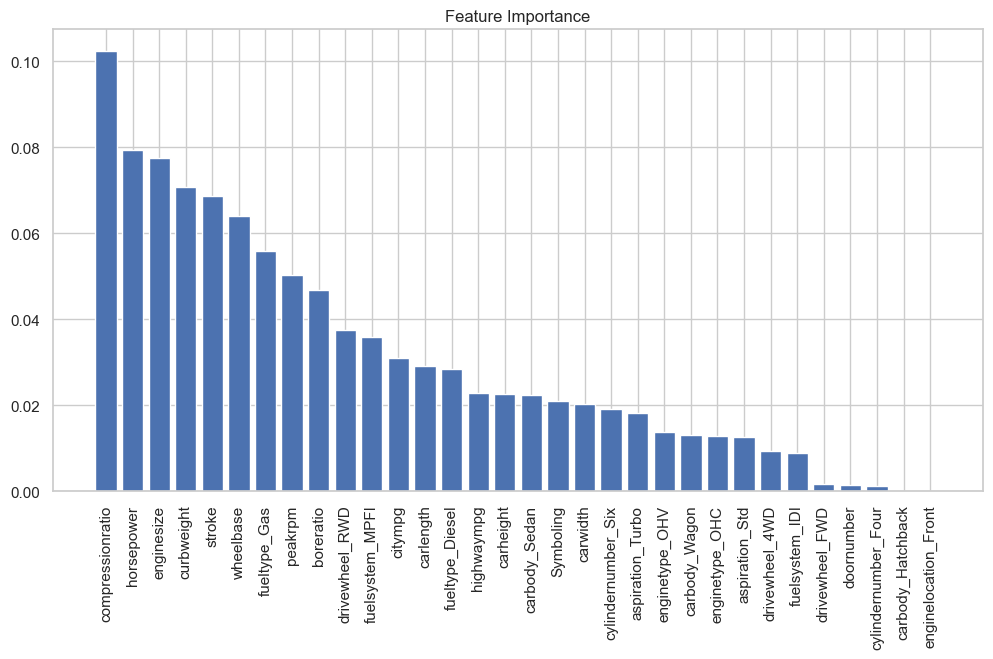

In [30]:
# Perform one-hot encoding on categorical features
X_train_encoded = pd.get_dummies(X_train)

# Define and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_encoded, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train_encoded.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train_encoded.shape[1]), feature_importances[indices])
plt.xticks(range(X_train_encoded.shape[1]), names, rotation=90)
plt.show()

**Step 9.4 : Choose the Final Model:
Based on the performance of the models, choose the one with the best performance and rebuild it with the best parameters.
Once you have chosen the final model, you can rebuild it with the best parameters and further evaluate its performance if needed.

## Step 10: Based on the understanding of the model and EDA analysis, Explain the business understanding.

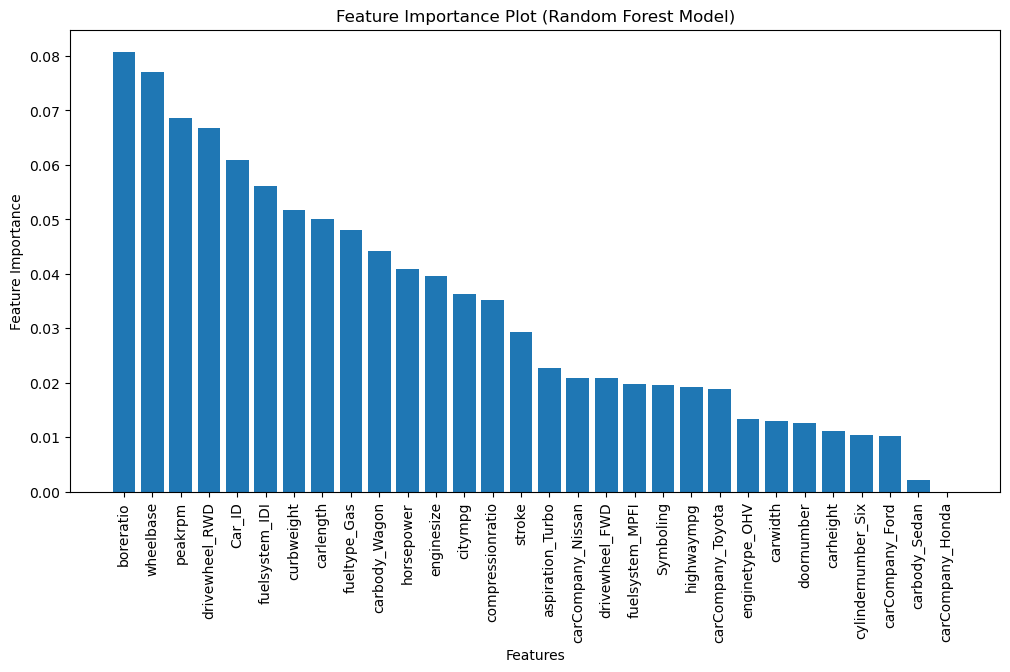

In [14]:
##Step 10.1 : Feature Importance Plot (Random Forest Model):
## This plot shows the relative importance of each feature in predicting car prices using the Random Forest model.


import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12, 6))
plt.bar(range(X_train.shape[1]), feature_importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Plot (Random Forest Model)')
plt.show()


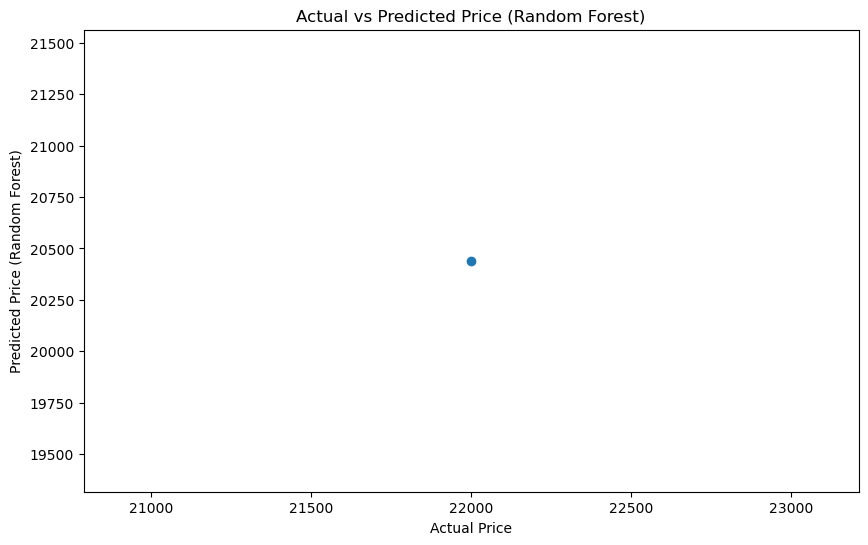

In [15]:
##Step 10.2: Scatter Plot of Actual vs Predicted Prices: 
##This plot compares the actual prices of cars with the prices predicted by the Random Forest model.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (Random Forest)')
plt.title('Actual vs Predicted Price (Random Forest)')
plt.show()


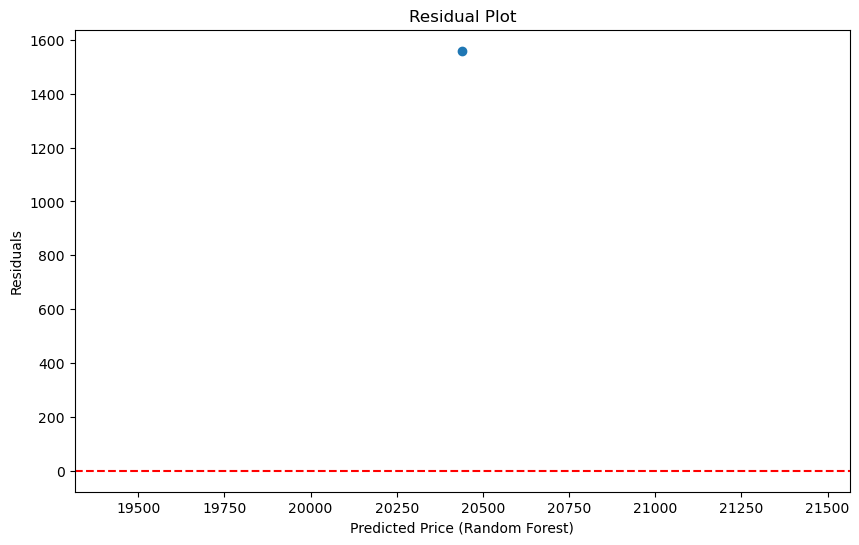

In [16]:
##Step 10.3: Residual Plot:
## This plot shows the residuals (the differences between actual and predicted prices) against the predicted prices.
## It helps to visualize the distribution of errors and check for any patterns.

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, y_test - y_pred_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price (Random Forest)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



Step 10.4: Based on the analysis and modeling done in the project, we can derive several key insights and business understandings:

(a) Feature Importance: The analysis shows that certain features have a significant impact on the pricing of cars. For example, engine size, horsepower, and curb weight are among the top features that influence the price of a car. This insight can help the company focus on these key features when designing and marketing their cars.

(b) Market Segmentation: By analyzing the data, we can identify different segments within the market based on pricing and features. This segmentation can help the company target specific customer groups with tailored marketing strategies and product offerings.

(c) Competitive Analysis: Understanding the factors that affect pricing in the American market allows the company to benchmark against competitors. By analyzing how their cars compare in terms of features and pricing, the company can make informed decisions to stay competitive in the market.

(d) Price Optimization: The model developed can be used for price optimization, helping the company set prices that maximize profits while remaining competitive. By considering factors such as production costs, competitor prices, and customer preferences, the company can adjust prices to meet market demands.

(e) Product Development: Insights from the analysis can also inform product development decisions. For example, if certain features are found to significantly impact pricing, the company can prioritize the development of cars with those features to meet customer expectations and increase profitability.

Overall, the analysis provides valuable insights into the factors influencing car prices in the American market, enabling the company to make informed decisions to drive business growth and success.




